In [1]:
import numpy as np
import pandas as pd

In [2]:
#https://www.shimmersensing.com/support/sample-data/
df=pd.read_csv('SampleGSRPPG_Session1_Shimmer_B640_Calibrated_SD.csv', sep=',',header=1)
df

,yyyy/mm/dd hh:mm:ss.000,mV
0,51:15.3,1180.952381
1,51:15.3,1175.824176
2,51:15.3,1171.428571
3,51:15.3,1168.498168
4,51:15.3,1169.230769
5,51:15.3,1171.428571
6,51:15.3,1172.161172
7,51:15.3,1172.161172
8,51:15.3,1170.695971
9,51:15.4,1167.032967


In [3]:
ppg=df.values[:,1].astype(np.double)

In [4]:
ppg

array([1180.952381, 1175.824176, 1171.428571, ..., 1233.699634,
       1231.501832, 1230.03663 ])

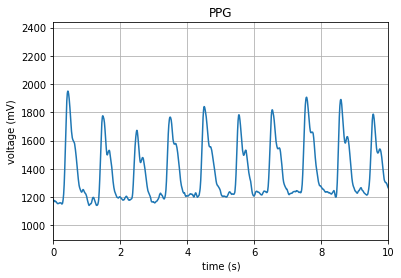

In [11]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fs = 128
t = np.arange(ppg.shape[0])/fs
ax.plot(t,ppg)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='PPG')
plt.xlim(0,10)
ax.grid()
fig.savefig("test.png")
plt.show()


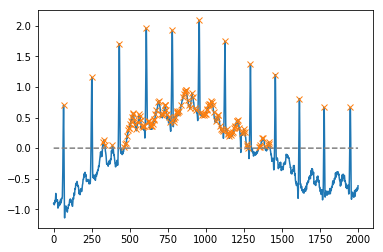

In [12]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

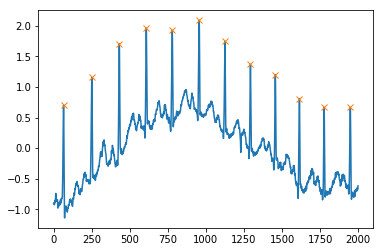

In [13]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

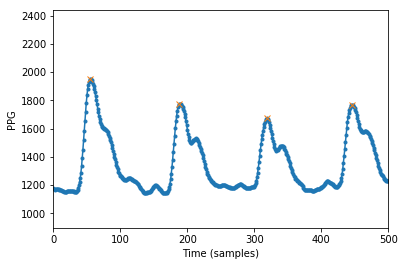

In [14]:
fs = 128
peaks, _ = find_peaks(ppg, distance=fs * 40 / 60)
plt.plot(ppg,'.-')
plt.plot(peaks, ppg[peaks], "x")
plt.xlim(0,500)
plt.ylabel('PPG')
plt.xlabel('Time (samples)')
plt.show()



In [ ]:
np.diff(peaks) 

In [ ]:
np.mean(np.diff(peaks) / fs * 60)

In [ ]:
import matplotlib.pyplot as plt
fs = 128
f = 1
t = np.arange(128)
x = np.sin(t*2*np.pi*f/fs)
plt.plot(t,x)
np.pi

In [ ]:
fs = 128
f = 20
t = np.arange(128)
x = np.sin(t*2*np.pi*f/fs)
sp = np.fft.fft(x)/x.shape[0]
freq = fs*np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.show()

In [ ]:
fs = 128
NFFT = 4096
sp = np.fft.fft(ppg - np.mean(ppg),NFFT)/ppg.shape[0]
t = np.arange(NFFT)
freq = fs*np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.xlim([0, 10])
plt.show()

In [ ]:
freq[np.argmax(abs(sp))]

In [ ]:
1/freq[np.argmax(abs(sp))]*60